# Proyecto Modelación y Simulación

Integrantes:
- Oscar López
- Yong Park
- Rodrigo Barrera

In [19]:
import pandas as pd
import numpy as np

In [20]:
covid_data = pd.read_csv('./data/covid-data.csv')

In [21]:
covid_data

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2         2  ...       2        2   
1                1   72        97         2  ...       2        2   
2                2   55        97         1  ...       2        2   
3                2   53         2         2  ...       2        2   
4                2   68        97         1  ...       2        2   
...            ...  ...       ...       ...  ...     ...      ...   
1048570          2   40        97         2  ...       2        2   
1048571          2   51        97         2  ...       2        2   
1048572          2   55        97         2  ...       2        2   
1048573          2   28        97         2  ...       2        2   
1048574          2   52        97         2  ...       2        2   

         HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  \
0                   1              2               2        2              2   
1                   1              2               2        1              1   
2                   2              2               2        2              2   
3                   2              2               2        2              2   
4                   1              2               2        2              2   
...               ...            ...             ...      ...            ...   
1048570             2              2               2        2              2   
1048571             1              2               2        2              2   
1048572             2              2               2        2              2   
1048573             2              2               2        2              2   
1048574             2              2               2        2              2   

         TOBACCO  CLASIFFICATION_FINAL  ICU  
0              2                     3   97  
1              2                     5   97  
2              2                     3    2  
3              2                     7   97  
4              2                     3   97  
...          ...                   ...  ...  
1048570        2                     7   97  
1048571        2                     7    2  
1048572        2                     7   97  
1048573        2                     7   97  
1048574        2                     7   97  

[1048575 rows x 21 columns]

In [22]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [23]:
covid_data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [24]:
covid_data["INTUBED"].unique()

array([97,  1,  2, 99], dtype=int64)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, Image as IPImage

In [26]:
class Person:
    def __init__(self, age, sex, pregnant, diabetes, asthma, immunosuppressed,
                 hypertension, other_disease, cardiovascular, obesity,
                 renal_chronic, tobacco,pheumonia, intubed,position):
        self.age = age
        self.sex = sex
        self.pregnant = pregnant
        self.diabetes = diabetes
        self.asthma = asthma
        self.immunosuppressed = immunosuppressed
        self.hypertension = hypertension
        self.other_disease = other_disease
        self.cardiovascular = cardiovascular
        self.obesity = obesity
        self.renal_chronic = renal_chronic
        self.tobacco = tobacco
        self.pheumonia = pheumonia
        self.intubed = intubed
        self.position = position
        self.recovered = False
        self.dead = False
        self.infected = False


In [27]:
def distance(p1, p2):
    return np.linalg.norm(p1.position - p2.position)


In [28]:
def calculate_infection_probability(person, other):
    # Puedes ajustar esta función según tus necesidades y datos específicos
    # Aquí estoy asumiendo una probabilidad básica y ajustándola según diferentes factores.
    base_prob = 0.3
    age_factor = 0.5
    # Aumentar la probabilidad para mayores de 50
    if person.age > 50:
        age_factor *= 1.8

    # Aumentar la probabilidad para menores de 3 años
    if person.age < 3:
        age_factor *= 2.0
        
    sex_factor = 1.2 if person.sex == 2 else 1  # Mayor probabilidad en hombres
    disease_factor = 1.5 if person.other_disease == 1 else 1  # Mayor probabilidad si tiene otras enfermedades
    pheumonia_factor = 2.5 if person.pheumonia == 1 else 1
    inmmunosuppresed_factor = 1.9 if person.immunosuppressed == 1 else 1
    tabaco_factor = 1.7 if person.tobacco == 1 else 1
    cardiovascular_factor = 1.4 if person.cardiovascular == 1 else 1
    return (base_prob * age_factor * sex_factor * disease_factor * pheumonia_factor * inmmunosuppresed_factor * tabaco_factor * cardiovascular_factor) / 8


In [29]:
def calculate_recovery_probability(person):
    # Probabilidad base
    base_prob = 0.4

    # Factores ajustados
    age_factor = 1.3 if 4 <= person.age <= 49 else 1
    pneumonia_factor = 1.3 if person.pheumonia == 2 else 0.2
    other_disease_factor = 1 if person.other_disease == 2 else 0.2
    intubed_factor = 1.2 if person.intubed == 1 else 0.3

    return (base_prob * age_factor * pneumonia_factor * other_disease_factor * intubed_factor) / 5

def calculate_death_probability(person):
    # Probabilidad base
    base_prob = 0.05

    # Factores ajustados
    age_factor = 1.2 if person.age < 3 or person.age > 50 else 0.3
    pneumonia_factor = 1.5 if person.pheumonia == 1 else 0.2
    intubed_factor = 1.8 if person.intubed == 2 else 0.3

    return (base_prob * age_factor * pneumonia_factor * intubed_factor) / 4


In [30]:
# Crear una población
num_people = 1000
people = [Person(
    np.random.randint(18, 90),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.array([np.random.rand()*100, np.random.rand()*100])
) for _ in range(num_people)]

In [31]:
# Simular la infección de una persona aleatoria
patient_zero = np.random.choice(people)
patient_zero.infected = True

In [32]:
# Simulación
num_days = 30
infection_radius = 7
list_images = []
results = []

In [33]:
for day in range(num_days):
    for person in people:
        if person.infected:
            for other in people:
                if not other.infected and distance(person, other) < infection_radius:
                    infection_prob = calculate_infection_probability(person, other)
                    if np.random.rand() < infection_prob:
                        other.infected = True
        
        if person.infected and not person.dead and not person.recovered:
            # Probabilidad de muerte
            death_prob = calculate_death_probability(person)
            # print("death_prob: ",death_prob)
            if np.random.rand() < death_prob:
                person.dead = True
        
        if person.infected and not person.dead:
            # Probabilidad de recuperación
            recovery_prob = calculate_recovery_probability(person)
            # print("recovery_prob: ",recovery_prob)
            if np.random.rand() < recovery_prob:
                person.infected = False
                person.recovered = True
        

    # Actualización del gráfico
    x_infected = [person.position[0] for person in people if person.infected]
    y_infected = [person.position[1] for person in people if person.infected]
    x_not_infected = [person.position[0] for person in people if not person.infected]
    y_not_infected = [person.position[1] for person in people if not person.infected]
    x_recovered = [person.position[0] for person in people if person.recovered]
    y_recovered = [person.position[1] for person in people if person.recovered]
    x_dead = [person.position[0] for person in people if person.dead]
    y_dead = [person.position[1] for person in people if person.dead]
    
    num_not_infected = sum(1 for person in people if not person.infected)
    num_infected = sum(1 for person in people if person.infected and not person.recovered and not person.dead)
    num_recovered = sum(1 for person in people if person.recovered)
    num_dead = sum(1 for person in people if person.dead)
    
    results.append([num_not_infected,num_infected,num_recovered,num_dead])
    
    # Graficar
    plt.plot(x_infected, y_infected, "ro", label="Infected")
    plt.plot(x_not_infected, y_not_infected, "bo")
    plt.plot(x_recovered, y_recovered, "go", label="Recovered")
    plt.plot(x_dead, y_dead, "ko", label="Dead")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Day " + str(day))
    plt.legend()
    name = "./results/day_" + str(day) + ".jpg"
    plt.savefig(name, format="jpg")
    plt.close()
    list_images.append(name)



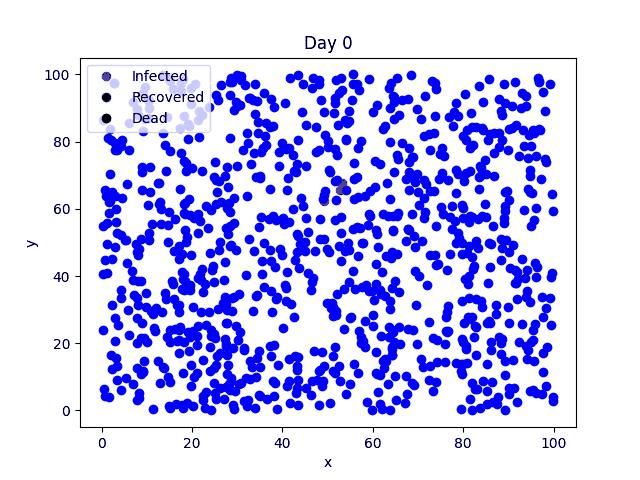

In [34]:
# Guardar imágenes como un GIF
gif_path = "./results/animation_complex.gif"
images = [Image.open(path) for path in list_images]
images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=400)
display(IPImage(filename=gif_path))

In [36]:
d = 1
for i in results:
    # Imprimir resultados
    print(f"Day {d}:")
    print(f"  Not Infected: {i[0]}")
    print(f"  Infected: {i[1]}")
    print(f"  Recovered: {i[2]}")
    print(f"  Dead: {i[3]}")
    d+=1

Day 1:
  Not Infected: 997
  Infected: 3
  Recovered: 0
  Dead: 0
Day 2:
  Not Infected: 980
  Infected: 20
  Recovered: 0
  Dead: 0
Day 3:
  Not Infected: 937
  Infected: 63
  Recovered: 0
  Dead: 0
Day 4:
  Not Infected: 841
  Infected: 156
  Recovered: 3
  Dead: 1
Day 5:
  Not Infected: 752
  Infected: 237
  Recovered: 9
  Dead: 4
Day 6:
  Not Infected: 634
  Infected: 347
  Recovered: 14
  Dead: 6
Day 7:
  Not Infected: 556
  Infected: 414
  Recovered: 28
  Dead: 11
Day 8:
  Not Infected: 495
  Infected: 460
  Recovered: 36
  Dead: 14
Day 9:
  Not Infected: 431
  Infected: 509
  Recovered: 50
  Dead: 18
Day 10:
  Not Infected: 346
  Infected: 575
  Recovered: 58
  Dead: 26
Day 11:
  Not Infected: 256
  Infected: 653
  Recovered: 68
  Dead: 32
Day 12:
  Not Infected: 172
  Infected: 715
  Recovered: 89
  Dead: 37
Day 13:
  Not Infected: 105
  Infected: 755
  Recovered: 112
  Dead: 46
Day 14:
  Not Infected: 55
  Infected: 777
  Recovered: 128
  Dead: 51
Day 15:
  Not Infected: 33
  